In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from ray.tune import ExperimentAnalysis

notebook_path = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_path, '..')))

from utils.constants import TRAIN_RESULTS_PATH
%matplotlib inline

In [2]:
experiments_info = [
    {
        "containers": 6,
        "legend": "IMPALA-6",
        "algorithm": "IMPALA",
        "trial": "IMPALA_SimEdgeEnv_c3861_00000_0_2024-10-13_14-12-14"},
    {
        "containers": 12,
        "legend": "IMPALA-12",
        "algorithm": "IMPALA",
        "trial": "IMPALA_SimEdgeEnv_da1af_00000_0_2024-10-13_12-54-07"
    },
    {
        "containers": 18,
        "legend": "IMPALA-18",
        "algorithm": "IMPALA",
        "trial": "IMPALA_SimEdgeEnv_7f87e_00000_0_2024-10-14_20-14-13"
    }
]

In [10]:
def load_experiments(containers, legend, algorithm, trial):

    experiment_folder_path = os.path.join(
        TRAIN_RESULTS_PATH, f"{algorithm}_{containers}")
    
    analysis = ExperimentAnalysis(experiment_folder_path)
    id = list(analysis.trial_dataframes.keys())[0]
    df = analysis.trial_dataframes[id]

    with open(
        os.path.join(
            experiment_folder_path, trial, 'result.json'), 'r') as f:
        result = f.read().split('\n')
    episodes_reward = pd.DataFrame({'timestep':[], 'reward':[]})
 
    return legend, df, episodes_reward


In [11]:
experiments = {}
# episodes_rewards = []
for experiment_info in experiments_info:
    legend, df_selected, episodes_reward = load_experiments(**experiment_info)
    experiments[experiment_info['containers']] = df_selected
    # episodes_rewards.append(episodes_reward)

In [28]:
# Convert columns to a list and print them
all_columns = list(experiments[6].columns)

# Print each column name (one per line)
for col in all_columns:
    print(col)


num_healthy_workers
num_in_flight_async_sample_reqs
num_remote_worker_restarts
num_agent_steps_sampled
num_agent_steps_trained
num_env_steps_sampled
num_env_steps_trained
num_env_steps_sampled_this_iter
num_env_steps_trained_this_iter
num_env_steps_sampled_throughput_per_sec
num_env_steps_trained_throughput_per_sec
timesteps_total
num_env_steps_sampled_lifetime
num_agent_steps_sampled_lifetime
num_steps_trained_this_iter
agent_timesteps_total
done
training_iteration
trial_id
date
timestamp
time_this_iter_s
time_total_s
pid
hostname
node_ip
time_since_restore
iterations_since_restore
info/learner/default_policy/learner_stats/allreduce_latency
info/learner/default_policy/learner_stats/grad_gnorm
info/learner/default_policy/learner_stats/cur_lr
info/learner/default_policy/learner_stats/total_loss
info/learner/default_policy/learner_stats/policy_loss
info/learner/default_policy/learner_stats/entropy
info/learner/default_policy/learner_stats/entropy_coeff
info/learner/default_policy/learner

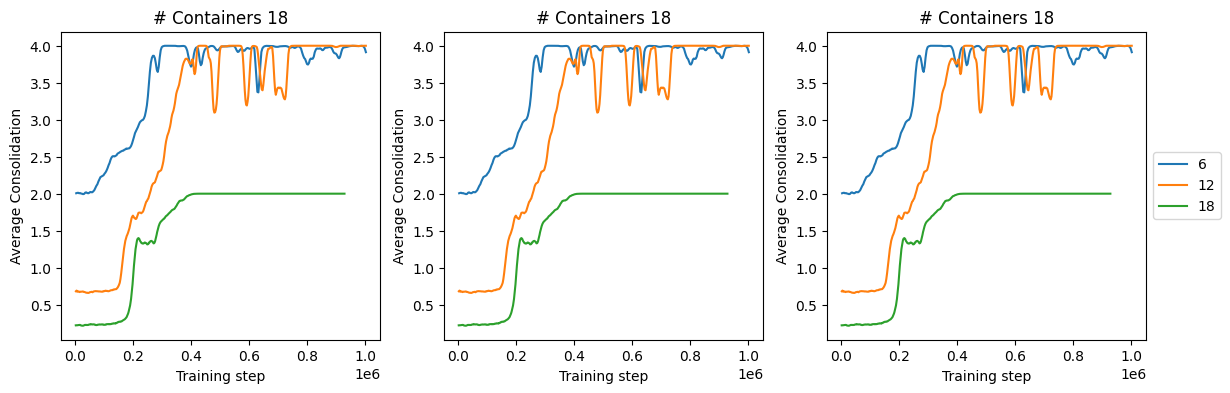

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax in axes:
    for label, dataframe in experiments.items():
        ax.plot(
            dataframe['timesteps_total'],
            dataframe['env_runners/custom_metrics/num_consolidated_mean'], label=label)
        ax.set_title('# Containers {}'.format(label))
for ax in axes.flat:
    ax.set(xlabel='Training step', ylabel='Average Consolidation')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

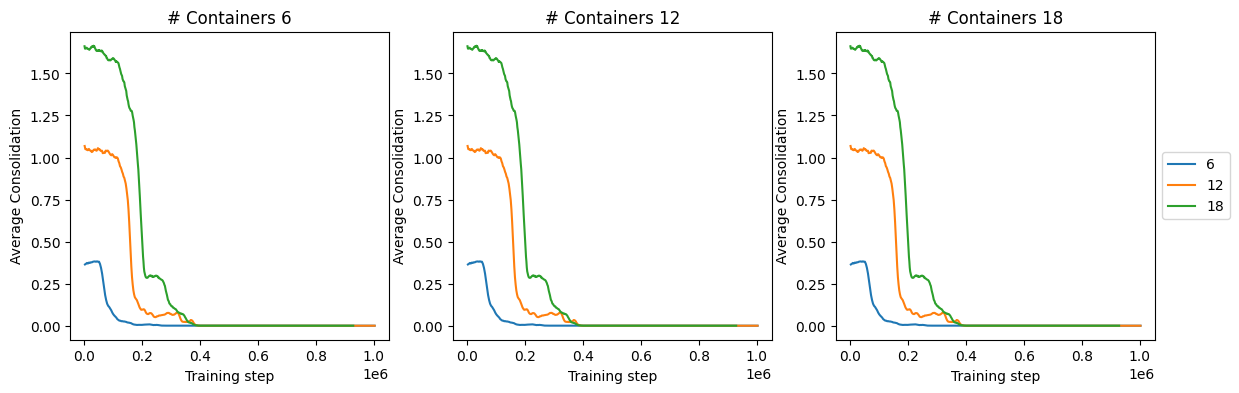

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for num_containers, ax in zip([6,12,18], axes):
    for label, dataframe in experiments.items():
        ax.plot(
            dataframe['timesteps_total'],
            dataframe['env_runners/custom_metrics/num_overloaded_mean'], label=label)
        ax.set_title('# Containers {}'.format(num_containers))
for ax in axes.flat:
    ax.set(xlabel='Training step', ylabel='Average Consolidation')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Training Rewards

In [5]:
trian6 = pd.read_csv('/home/babarali/OSKube/data/trainresults/IMPALA_6/IMPALA_SimEdgeEnv_c3861_00000_0_2024-10-13_14-12-14/progress.csv')
trian12 = pd.read_csv('/home/babarali/OSKube/data/trainresults/IMPALA_12/IMPALA_SimEdgeEnv_da1af_00000_0_2024-10-13_12-54-07/progress.csv')
trian18 = pd.read_csv('/home/babarali/OSKube/data/trainresults/IMPALA_18/IMPALA_SimEdgeEnv_7f87e_00000_0_2024-10-14_20-14-13/progress.csv')

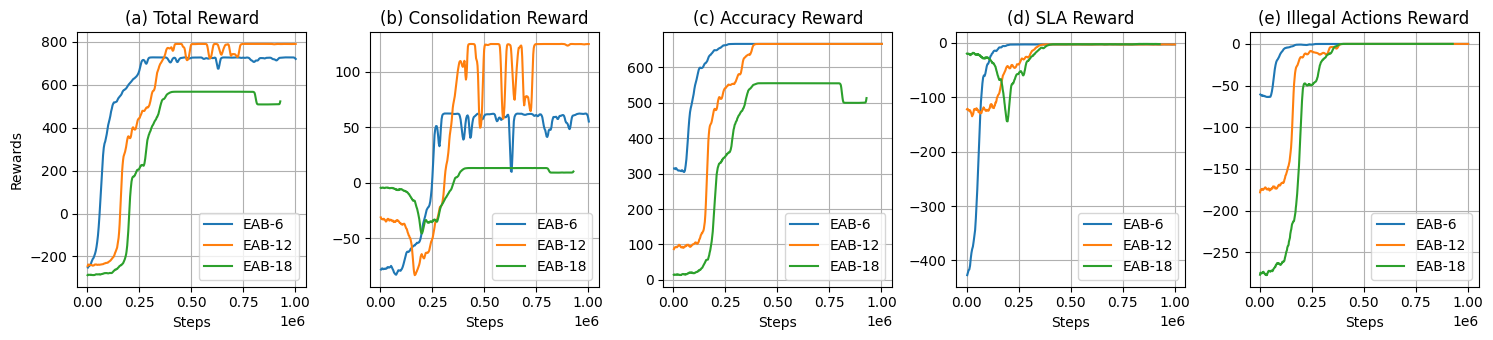

In [251]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 3.5))

ax1.plot(trian6['timesteps_total'], trian6['env_runners/episode_reward_mean'], label='EAB-6')
ax1.plot(trian12['timesteps_total'], trian12['env_runners/episode_reward_mean'], label='EAB-12')
ax1.plot(trian18['timesteps_total'], trian18['env_runners/episode_reward_mean'], label='EAB-18')
ax1.set_ylabel('Rewards')
ax1.set_xlabel('Steps')
ax1.grid(True)
ax1.set_title('(a) Total Reward')
ax1.legend(loc='lower right')

ax2.plot(trian6['timesteps_total'], trian6['env_runners/custom_metrics/reward_consolidation_sum_mean'], label='EAB-6')
ax2.plot(trian12['timesteps_total'], trian12['env_runners/custom_metrics/reward_consolidation_sum_mean'], label='EAB-12')
ax2.plot(trian18['timesteps_total'], trian18['env_runners/custom_metrics/reward_consolidation_sum_mean'], label='EAB-18')
ax2.set_xlabel('Steps')
ax2.grid(True)
ax2.set_title('(b) Consolidation Reward')
ax2.legend(loc='lower right')

ax3.plot(trian6['timesteps_total'], trian6['env_runners/custom_metrics/reward_accuracy_sum_mean'], label='EAB-6')
ax3.plot(trian12['timesteps_total'], trian12['env_runners/custom_metrics/reward_accuracy_sum_mean'], label='EAB-12')
ax3.plot(trian18['timesteps_total'], trian18['env_runners/custom_metrics/reward_accuracy_sum_mean'], label='EAB-18')
#ax3.set_ylabel('Accuracy Reward')
ax3.set_xlabel('Steps')
#ax2.set_ylim([0,20])
ax3.grid(True)
ax3.set_title('(c) Accuracy Reward')
ax3.legend(loc='lower right')

ax4.plot(trian6['timesteps_total'], trian6['env_runners/custom_metrics/reward_sla_sum_mean'], label='EAB-6')
ax4.plot(trian12['timesteps_total'], trian12['env_runners/custom_metrics/reward_sla_sum_mean'], label='EAB-12')
ax4.plot(trian18['timesteps_total'], trian18['env_runners/custom_metrics/reward_sla_sum_mean'], label='EAB-18')
#ax4.set_ylabel('SLA Reward')
ax4.set_xlabel('Steps')
ax4.grid(True)
ax4.set_title('(d) SLA Reward')
ax4.legend(loc='lower right')


ax5.plot(trian6['timesteps_total'], trian6['env_runners/custom_metrics/reward_illegal_sum_mean'], label='EAB-6')
ax5.plot(trian12['timesteps_total'], trian12['env_runners/custom_metrics/reward_illegal_sum_mean'], label='EAB-12')
ax5.plot(trian18['timesteps_total'], trian18['env_runners/custom_metrics/reward_illegal_sum_mean'], label='EAB-18')
#ax4.set_ylabel('SLA Reward')
ax5.set_xlabel('Steps')
ax5.grid(True)
ax5.set_title('(e) Illegal Actions Reward')
ax5.legend(loc='lower right')

#plt.subplots_adjust(wspace=0.25) 

plt.tight_layout()
plt.savefig('rewards.pdf', format='pdf')
plt.show()

## Training Stats

In [ ]:

                ': 
                'num_overloaded':
                "mean_cluster_cpu_util": mean_cluster_util[0],
                "mean_cluster_mem_util": mean_cluster_util[1],
                '

In [91]:
np.mean(trian6['env_runners/custom_metrics/mean_accuracy_mean'])

42.222757098857436

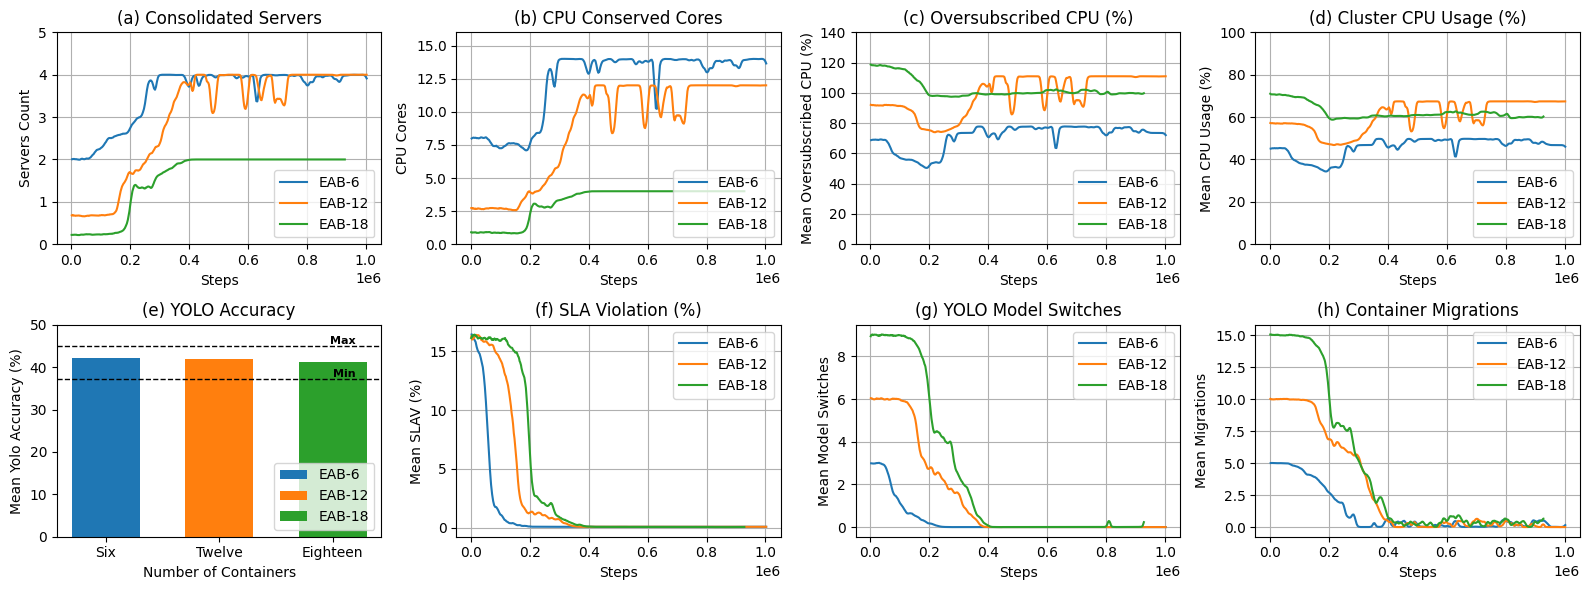

In [250]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(16, 6))

ax1.plot(trian6['timesteps_total'], trian6['env_runners/custom_metrics/num_consolidated_mean'], label='EAB-6')
ax1.plot(trian12['timesteps_total'], trian12['env_runners/custom_metrics/num_consolidated_mean'], label='EAB-12')
ax1.plot(trian18['timesteps_total'], trian18['env_runners/custom_metrics/num_consolidated_mean'], label='EAB-18')
ax1.set_ylabel('Servers Count')
ax1.set_xlabel('Steps')
ax1.set_ylim([0,5])
ax1.grid(True)
ax1.set_title('(a) Consolidated Servers')
ax1.legend(loc='lower right')

ax2.plot(trian6['timesteps_total'], trian6['env_runners/custom_metrics/cpu_conserved_cost_mean'], label='EAB-6')
ax2.plot(trian12['timesteps_total'], trian12['env_runners/custom_metrics/cpu_conserved_cost_mean'], label='EAB-12')
ax2.plot(trian18['timesteps_total'], trian18['env_runners/custom_metrics/cpu_conserved_cost_mean'], label='EAB-18')
ax2.set_xlabel('Steps')
ax2.set_ylabel('CPU Cores')
ax2.set_ylim([0,16])
ax2.grid(True)
ax2.set_title('(b) CPU Conserved Cores')
ax2.legend(loc='lower right')

ax3.plot(trian6['timesteps_total'], trian6['env_runners/custom_metrics/oversub_cores_mean']*100, label='EAB-6')
ax3.plot(trian12['timesteps_total'], trian12['env_runners/custom_metrics/oversub_cores_mean']*100, label='EAB-12')
ax3.plot(trian18['timesteps_total'], trian18['env_runners/custom_metrics/oversub_cores_mean']*100, label='EAB-18')
#ax4.set_ylabel('SLA Reward')
ax3.set_xlabel('Steps')
ax3.set_ylabel('Mean Oversubscribed CPU (%)')
ax3.grid(True)
ax3.set_ylim([0,140])
ax3.set_title('(c) Oversubscribed CPU (%)')
ax3.legend(loc='lower right')

ax4.plot(trian6['timesteps_total'], trian6['env_runners/custom_metrics/mean_cluster_cpu_util_mean']*100, label='EAB-6')
ax4.plot(trian12['timesteps_total'], trian12['env_runners/custom_metrics/mean_cluster_cpu_util_mean']*100, label='EAB-12')
ax4.plot(trian18['timesteps_total'], trian18['env_runners/custom_metrics/mean_cluster_cpu_util_mean']*100, label='EAB-18')
#ax4.set_ylabel('SLA Reward')
ax4.set_xlabel('Steps')
ax4.set_ylabel('Mean CPU Usage (%)')
ax4.grid(True)
ax4.set_ylim([0,100])
ax4.set_title('(d) Cluster CPU Usage (%)')
ax4.legend(loc='lower right')

bar_width = 0.6  # Increase the width since there are only 3 bars now
x_pos = np.array([1, 2, 3])  # Positions for the bars (for Six, Twelve, Eighteen)
ax5.bar(x_pos[0], np.mean(trian6['env_runners/custom_metrics/mean_accuracy_mean']), width=bar_width, label='EAB-6')
ax5.bar(x_pos[1], np.mean(trian12['env_runners/custom_metrics/mean_accuracy_mean']), width=bar_width, label='EAB-12')
ax5.bar(x_pos[2], np.mean(trian18['env_runners/custom_metrics/mean_accuracy_mean']), width=bar_width, label='EAB-18')
ax5.set_xticks(x_pos)
ax5.set_xticklabels(['Six', 'Twelve', 'Eighteen'])
ax5.set_xlabel('Number of Containers')
ax5.set_ylim([0, 50])
ax5.axhline(y=37.3, color='black', linestyle='--', linewidth=1)
ax5.axhline(y=44.9, color='black', linestyle='--', linewidth=1)
ax5.text(3.2, 37.3, 'Min', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=8, fontweight='bold')
ax5.text(3.2, 44.9, 'Max', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=8, fontweight='bold')
ax5.set_title('(e) YOLO Accuracy')
ax5.set_ylabel('Mean Yolo Accuracy (%)')
ax5.legend(loc='lower right')

ax6.plot(trian6['timesteps_total'], trian6['env_runners/custom_metrics/num_slav_mean']*100, label='EAB-6')
ax6.plot(trian12['timesteps_total'], trian12['env_runners/custom_metrics/num_slav_mean']*100, label='EAB-12')
ax6.plot(trian18['timesteps_total'], trian18['env_runners/custom_metrics/num_slav_mean']*100, label='EAB-18')
#a74.set_ylabel('SLA Reward')
ax6.set_xlabel('Steps')
ax6.set_ylabel('Mean SLAV (%)')
ax6.grid(True)
ax6.set_title('(f) SLA Violation (%)')
ax6.legend(loc='upper right')

ax7.plot(trian6['timesteps_total'], trian6['env_runners/custom_metrics/num_model_switches_mean'], label='EAB-6')
ax7.plot(trian12['timesteps_total'], trian12['env_runners/custom_metrics/num_model_switches_mean'], label='EAB-12')
ax7.plot(trian18['timesteps_total'], trian18['env_runners/custom_metrics/num_model_switches_mean'], label='EAB-18')
#a4.set_ylabel('SLA Reward')
ax7.set_xlabel('Steps')
ax7.set_ylabel('Mean Model Switches')
ax7.grid(True)
ax7.set_title('(g) YOLO Model Switches')
ax7.legend(loc='upper right')



ax8.plot(trian6['timesteps_total'], trian6['env_runners/custom_metrics/num_moves_mean'], label='EAB-6')
ax8.plot(trian12['timesteps_total'], trian12['env_runners/custom_metrics/num_moves_mean'], label='EAB-12')
ax8.plot(trian18['timesteps_total'], trian18['env_runners/custom_metrics/num_moves_mean'], label='EAB-18')
#ax4.set_ylabel('SLA Reward')
ax8.set_xlabel('Steps')
ax8.set_ylabel('Mean Migrations')
ax8.grid(True)
ax8.set_title('(h) Container Migrations')
ax8.legend(loc='upper right')

#plt.subplots_adjust(hspace=0.4) 
plt.tight_layout()
#plt.tight_layout()
plt.savefig('training_results.pdf', format='pdf')
plt.show()

In [254]:
np.mean(trian6['env_runners/custom_metrics/mean_accuracy_mean']), np.mean(trian12['env_runners/custom_metrics/mean_accuracy_mean']), np.mean(trian18['env_runners/custom_metrics/mean_accuracy_mean'])

(42.222757098857436, 42.019574952205666, 41.255859980767944)

In [ ]:
np.mean(trian6['env_runners/custom_metrics/mean_accuracy_mean'])

## Testing Stats

In [168]:
df_results6 = pd.read_csv('/home/babarali/OSKube/data/testresults/IMPALA/containers/6/tests/1/states.csv')
df_results12 = pd.read_csv("/home/babarali/OSKube/data/testresults/IMPALA/containers/12/tests/1/states.csv")
df_results18 = pd.read_csv("/home/babarali/OSKube/data/testresults/IMPALA/containers/18/tests/0/states.csv")

In [169]:
df_results12.columns

Index(['action', 'num_consolidated', 'num_moves', 'num_overloaded',
       'mean_accuracy', 'num_model_switches', 'num_slav', 'cpu_conserved_cost',
       'mean_cluster_cpu_util', 'mean_cluster_mem_util', 'oversub_cores',
       'reward_sla', 'reward_accuracy', 'reward_illegal',
       'reward_consolidation', 'reward'],
      dtype='object')

In [260]:
44.9-42.366, 44.9-41.10

(2.533999999999999, 3.799999999999997)

In [258]:
np.mean(df_results6['mean_accuracy']), np.mean(df_results12['mean_accuracy']), np.mean(df_results18['mean_accuracy'])

(42.366666666666696, 42.366666666666696, 41.10012063492064)

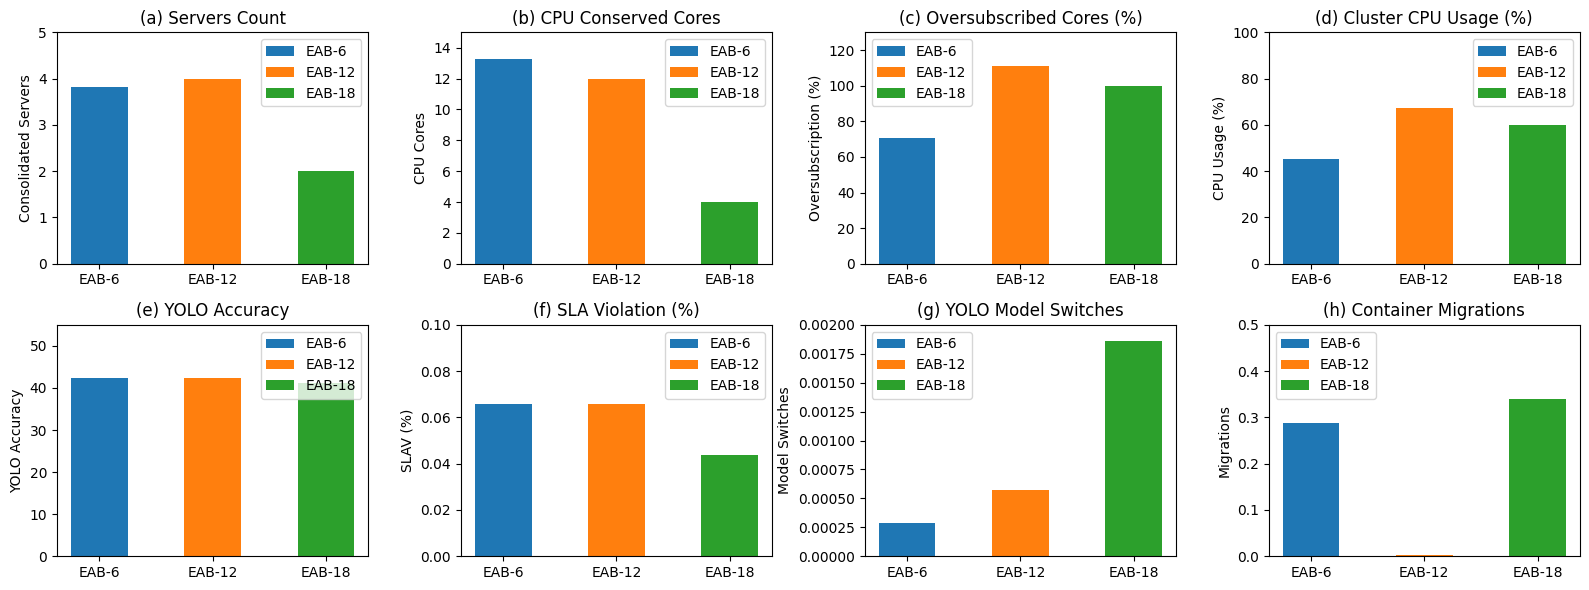

In [249]:
# Specify the columns to plot
columns_to_plot = [
    'num_consolidated', 
    'cpu_conserved_cost',
    'oversub_cores',
    'mean_cluster_cpu_util',
    'mean_accuracy',
    'num_slav',
    'num_model_switches',
    'num_moves'
]

# Create custom titles and labels
custom_titles = [
    '(a) Servers Count',
    '(b) CPU Conserved Cores',
    '(c) Oversubscribed Cores (%)',
    '(d) Cluster CPU Usage (%)',
    '(e) YOLO Accuracy',
    '(f) SLA Violation (%)',
    '(g) YOLO Model Switches',
    '(h) Container Migrations'
]

custom_y_labels = [
    'Consolidated Servers',
    'CPU Cores',
    'Oversubscription (%)',
    'CPU Usage (%)',
    'YOLO Accuracy',
    'SLAV (%)',
    'Model Switches',
    'Migrations'
]

custom_y_limits = [
    (0, 5),    # For 'num_consolidated'
    (0, 15),     # For 'cpu_conserved_cost'
    (0, 130),    # For 'oversub_cores'
    (0, 100),    # For 'mean_cluster_cpu_util'
    (0, 55),    # For 'mean_accuracy'
    (0, 0.1),    # For 'num_slav'
    (0, 0.002),     # For 'num_model_switches'
    (0, 0.5)      # For 'num_moves'
]

custom_x_labels = [
    'EAB-6',
    'EAB-12',
    'EAB-18'
]

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 6))  # 2 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

columns_to_multiply = ['oversub_cores', 'mean_cluster_cpu_util', 'num_slav']

for i, column in enumerate(columns_to_plot):
    # Create bar positions
    x = range(3)  # Only 3 DataFrames
    bar_width = 0.5
    
    # Calculate the mean values, multiplying by 100 where necessary
    mean_value_6 = np.mean(df_results6[column]) * (100 if column in columns_to_multiply else 1)
    mean_value_12 = np.mean(df_results12[column]) * (100 if column in columns_to_multiply else 1)
    mean_value_18 = np.mean(df_results18[column]) * (100 if column in columns_to_multiply else 1)
    
    # Plot bars for each DataFrame
    axes[i].bar(0, mean_value_6, width=bar_width, label='EAB-6')
    axes[i].bar(x[1], mean_value_12, width=bar_width, label='EAB-12')
    axes[i].bar(x[2], mean_value_18, width=bar_width, label='EAB-18')
    
    # Adding custom titles and labels
    axes[i].set_title(custom_titles[i])
    axes[i].set_xticks(x)  # Set x-ticks to be in the center of the grouped bars
    axes[i].set_xticklabels(custom_x_labels)  # Set x-tick labels
    axes[i].set_ylabel(custom_y_labels[i])  # Set y-axis label
    axes[i].set_ylim(custom_y_limits[i])  # Apply y-limits
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.savefig('testing_results.pdf', format='pdf')
plt.show()

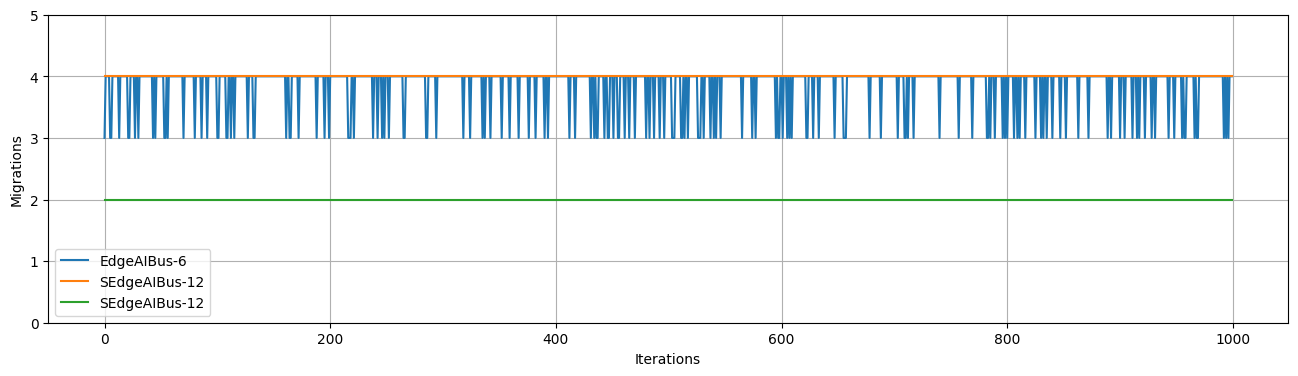

In [176]:
plt.figure(figsize=(16,4))
plt.plot(df_results6.index[:1000], df_results6['num_consolidated'][:1000], label='EdgeAIBus-6')
plt.plot(df_results12.index[:1000], df_results12['num_consolidated'][:1000], label='SEdgeAIBus-12')
plt.plot(df_results18.index[:1000], df_results18['num_consolidated'][:1000], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Migrations')
plt.legend()
plt.grid(True)
plt.ylim([0,5])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

In [173]:
np.sum(df_results6['num_moves'])/7000, np.sum(df_results12['num_moves']), np.sum(df_results18['num_moves'])

(0.28685714285714287, 21, 2384)

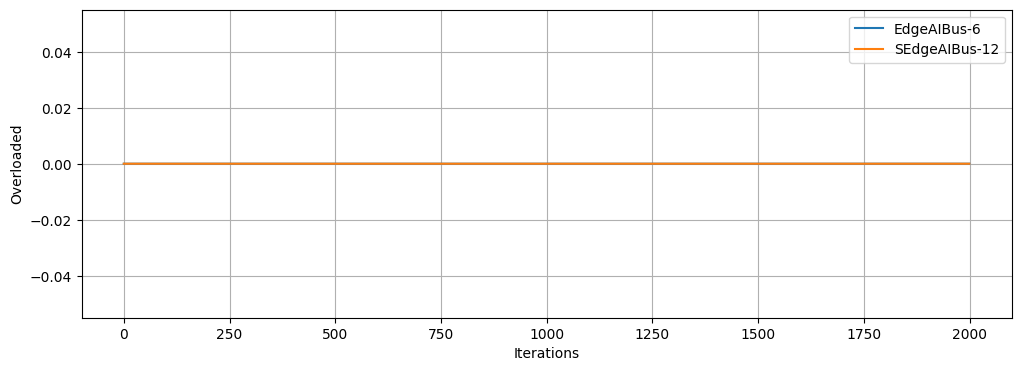

In [23]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['num_overloaded'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['num_overloaded'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
#plt.ylim([0,10])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

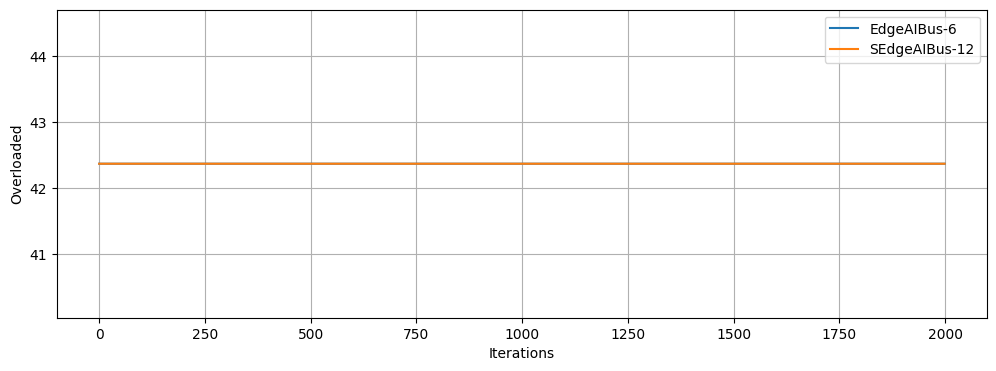

In [24]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['mean_accuracy'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['mean_accuracy'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
#plt.ylim([0,10])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

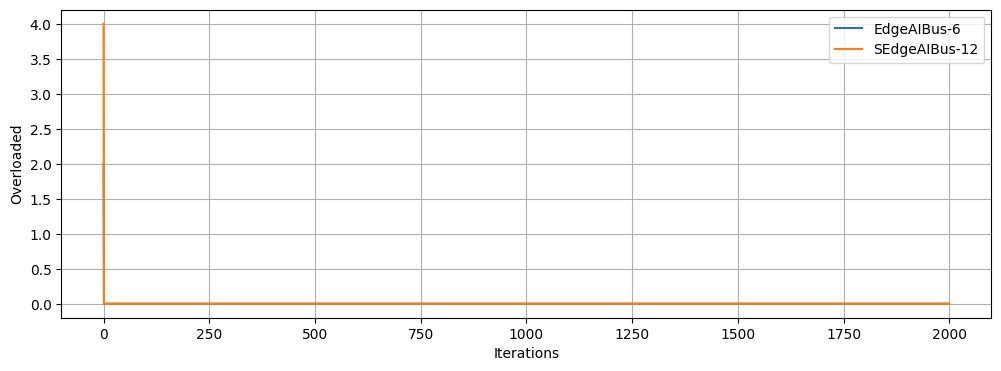

In [25]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['num_model_switches'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['num_model_switches'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
#plt.ylim([0,10])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

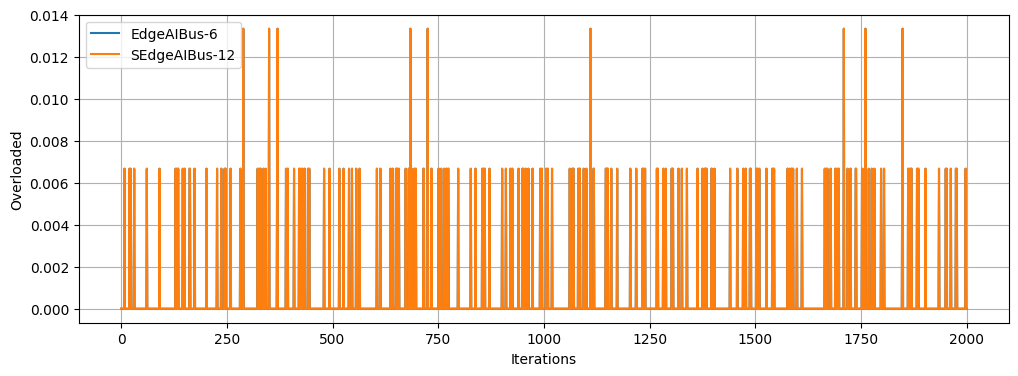

In [27]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['num_slav'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['num_slav'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
#plt.ylim([0,10])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

In [36]:
np.mean(df_results6['num_slav'])*100, np.mean(df_results12['num_slav'])*100

(0.06699999999999938, 0.06699999999999938)

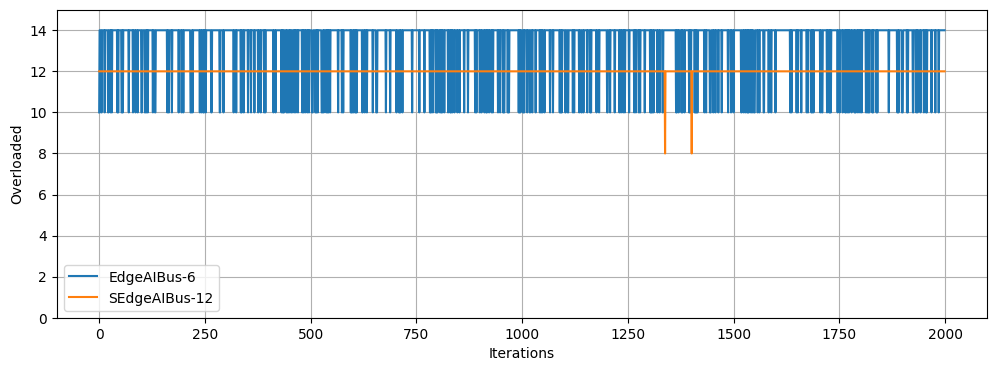

In [31]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['cpu_conserved_cost'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['cpu_conserved_cost'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
plt.ylim([0,15])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

In [33]:
np.mean(df_results6['cpu_conserved_cost']), np.mean(df_results12['cpu_conserved_cost'])

(13.354, 11.996)

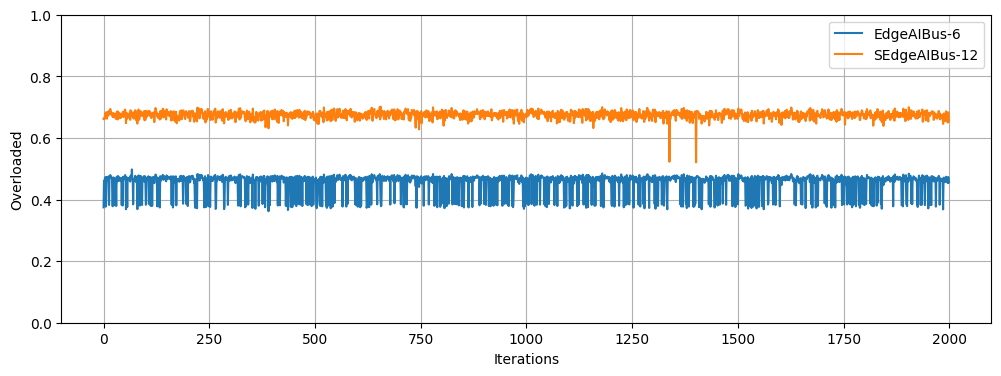

In [39]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['mean_cluster_cpu_util'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['mean_cluster_cpu_util'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
plt.ylim([0,1])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

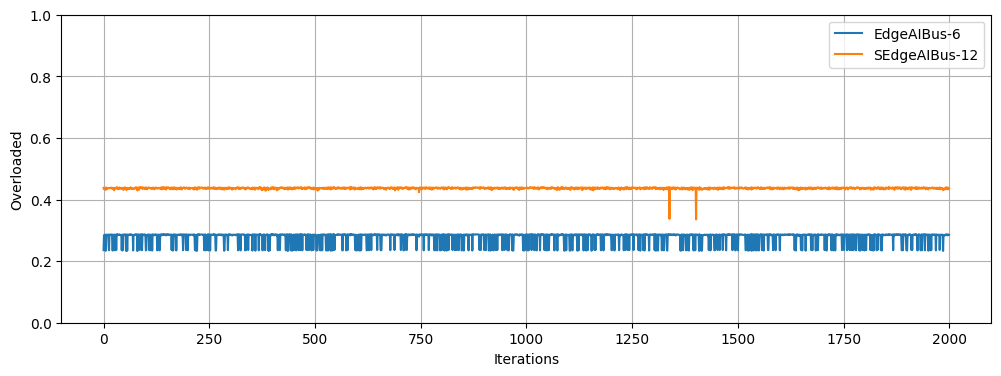

In [40]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['mean_cluster_mem_util'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['mean_cluster_mem_util'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
plt.ylim([0,1])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

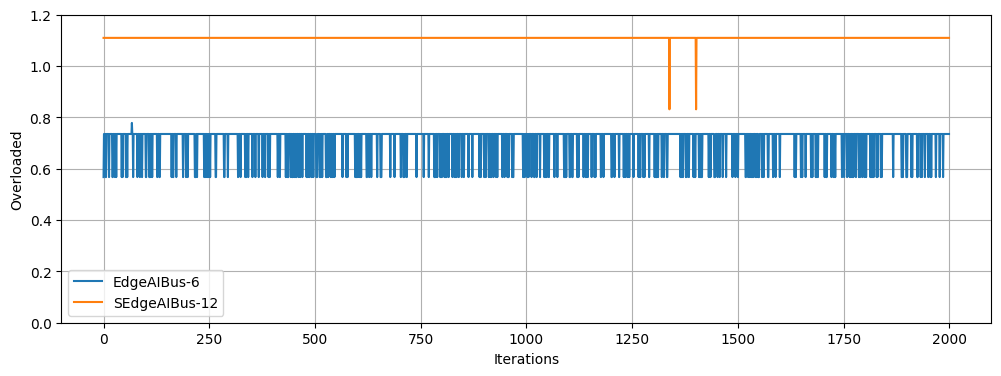

In [41]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['oversub_cores'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['oversub_cores'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
plt.ylim([0,1.2])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

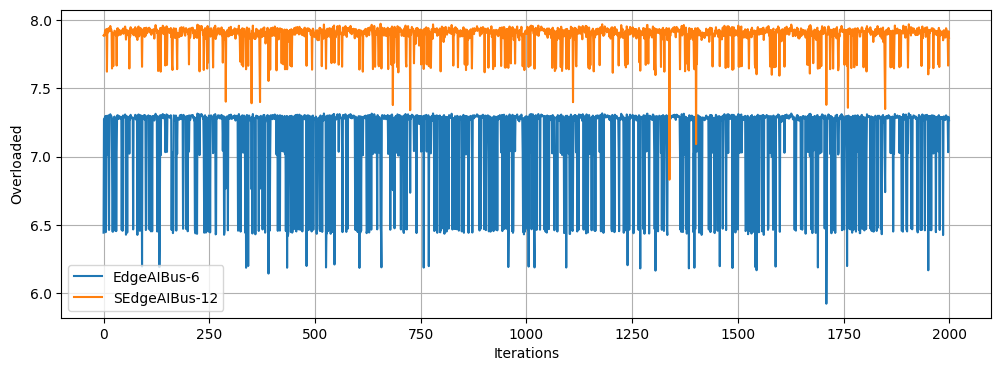

In [43]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['reward'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['reward'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
#plt.ylim([0,1.2])
#plt.savefig('cost.pdf', format='pdf')
plt.show()